In [98]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
font = {'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
from numpy import average
import weighted
import seaborn as sns

In [47]:
df = pd.read_csv('zip_codes_2018_5yr_geo_id_total_pop_median_income.csv')

In [48]:
# drop all rows with missing values
df = df.dropna(axis=0)
df

,geo_id,total_pop,median_income
0,55111,20.0,15000.0
1,96759,360.0,43649.0
2,40041,385.0,21458.0
3,99160,156.0,20385.0
4,51341,25.0,24375.0
...,...,...,...
30886,35463,1794.0,53897.0
30887,77664,2667.0,56833.0
30888,21822,2013.0,51731.0
30889,7418,2304.0,130563.0


In [14]:
#mean income using median_income without weighing by population
df.median_income.mean()

59031.42792399081

In [15]:
df['income_x_pop'] = df['median_income']*df['total_pop']

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_62653/2928599224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income_x_pop'] = df['median_income']*df['total_pop']


In [18]:
# Using median_income
df['income_x_pop'].sum() / df['total_pop'].sum()

64966.886811157325

In [28]:
df['income_x_pop'] = df['income_per_capita']*df['total_pop']

/var/folders/rs/ck6nby4n2s365r7sdf740jt00000gn/T/ipykernel_62653/2622268946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income_x_pop'] = df['income_per_capita']*df['total_pop']


In [29]:
df

,geo_id,total_pop,income_per_capita,income_x_pop
0,55111,20.0,12800.0,256000.0
1,96759,360.0,12032.0,4331520.0
2,40041,385.0,42191.0,16243535.0
3,99160,156.0,13979.0,2180724.0
4,51341,25.0,26284.0,657100.0
...,...,...,...,...
33115,38152,988.0,3705.0,3660540.0
33116,39322,1569.0,15349.0,24082581.0
33117,48109,5534.0,32902.0,182079668.0
33118,29613,1917.0,4473.0,8574741.0


In [30]:
# Using income_per_capita
df['income_x_pop'].sum() / df['total_pop'].sum()

32414.321611675263

In [34]:
# Ok. So since the per-zipcode median_income gives us a value closer to that of the result if you google it, 
# we will continue to use the median_income for our calculations. 

# Now... how do we calculate the median income using this table?
df = pd.read_csv('zip_codes_2018_5yr_geo_id_total_pop_median_income.csv')
df = df.dropna(axis=0)
df

,geo_id,total_pop,median_income
0,55111,20.0,15000.0
1,96759,360.0,43649.0
2,40041,385.0,21458.0
3,99160,156.0,20385.0
4,51341,25.0,24375.0
...,...,...,...
30886,35463,1794.0,53897.0
30887,77664,2667.0,56833.0
30888,21822,2013.0,51731.0
30889,7418,2304.0,130563.0


In [36]:
!pip install wquantiles

In [37]:
import weighted

In [40]:
# calculated the weighted median
weighted.median(df.median_income, df.total_pop)

58984.673501310564

In [41]:
# unweighted median
df.median_income.median()
# It makes sense that this is lower since it gives more weight to lower population 
# zip codes where the income is probably lower...

53958.0

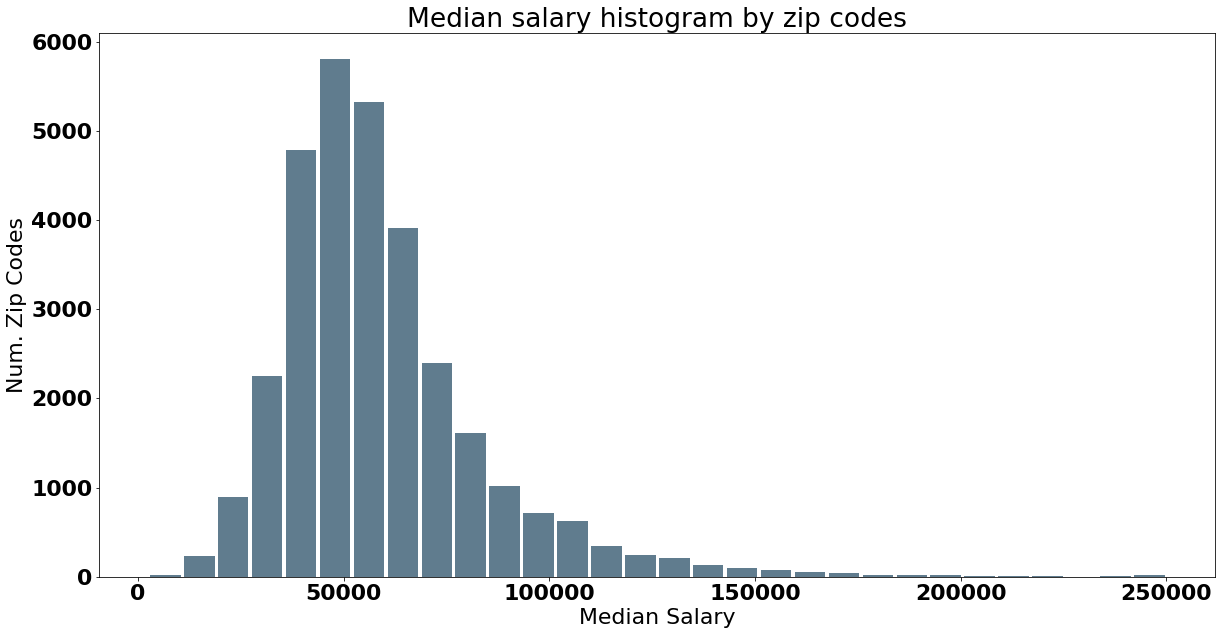

In [53]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
font = {'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
df.median_income.plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e')
plt.title('Median salary histogram by zip codes')
plt.xlabel('Median Salary')
plt.ylabel('Num. Zip Codes')
plt.grid(alpha=0.5)
# This histogram shows right skew, but it's also not weighted by the population. 
# It also doesn't have data on individuals

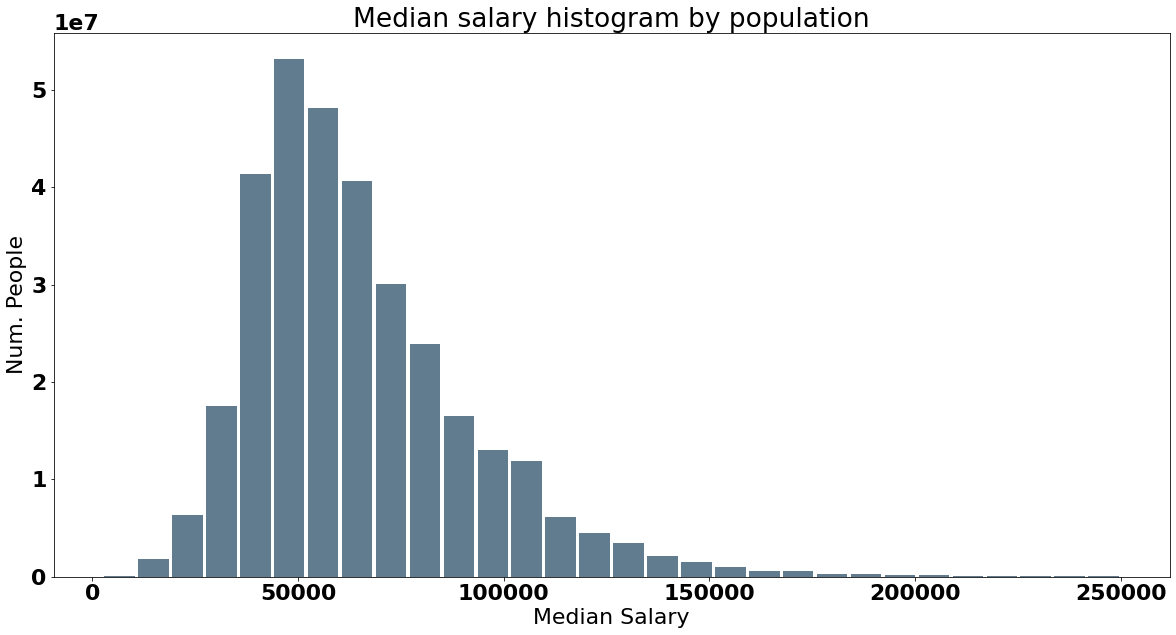

In [57]:
# Let's try to make this weighted. 
df.median_income.plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e', weights=df.total_pop)
plt.title('Median salary histogram by population')
plt.xlabel('Median Salary')
plt.ylabel('Num. People')
plt.grid(alpha=0.5)
# Weighing by the total population only increases the right skew. What does this mean? 
# This is a testament to income inequality in the united states. Why is this bad? 
# The median is lower than the mean. Too many people make way more than the median. 
# Hmm.., I guess you could look at is as there are too many people who at the low 
# median salary range. Would be better if the peak of this histogram were in the middle. 

In [55]:
# This is to justify that the total_pop value is indeed the number of humans and not some multiple
df.total_pop.sum()

325420714.0

In [ ]:
# Using data from the American Community Survey 2018 (ACS 5 Year 2018), identify the mean, median, and skew of 
# income in the United States. Then do the same for the states New York, California, Texas, and Florida. The 
# output should be a graph of a ranked national percentile for each state where the Y-axis is the income level, 
# and the X-axis is the percentile. E.g. 90th percentile of income for NY is $150,000 and it’s $110,000 for 
# Florida etc. You can check your work by googling similar bar charts (pretty common).

In [63]:
# Ok. Let's make the percentile plot. Um. This needs to be weighted as well, but let's see if we can do it 
# without weights first then add the weights later. 
np.percentile(df.median_income, 99)

149346.29999999996

In [49]:
def weighted_percentile(data, percents, weights=None):
    ''' percents in units of 1%
        weights specifies the frequency (count) of data.
    '''
    if weights is None:
        return np.percentile(data, percents)
    ind=np.argsort(data)
    d=data[ind]
    w=weights[ind]
    p=1.*w.cumsum()/w.sum()*100
    y=np.interp(percents, p, d)
    return y

In [50]:
weighted_percentile(df.median_income, 1, df.total_pop)

21146.165248278932

In [86]:
#percentiles = pd.DataFrame({'perc':1, 'income':21146.16524})
percentiles = pd.DataFrame()
for i in range(101):
    percentiles = pd.concat([percentiles, 
                            pd.DataFrame({'perc':[i], 
                                          'income':[weighted_percentile(df.median_income, i, df.total_pop)]})])

In [89]:
#percentiles = pd.DataFrame({'perc':[1], 'income':[21146.16524]})
percentiles.reset_index().drop(columns='index')

,perc,income
0,0,2499.000000
1,1,21146.165248
2,2,26236.316175
3,3,28406.933937
4,4,30534.365869
5,5,31891.000000
6,6,33467.413723
7,7,34665.948462
8,8,35592.032672
9,9,36262.683972


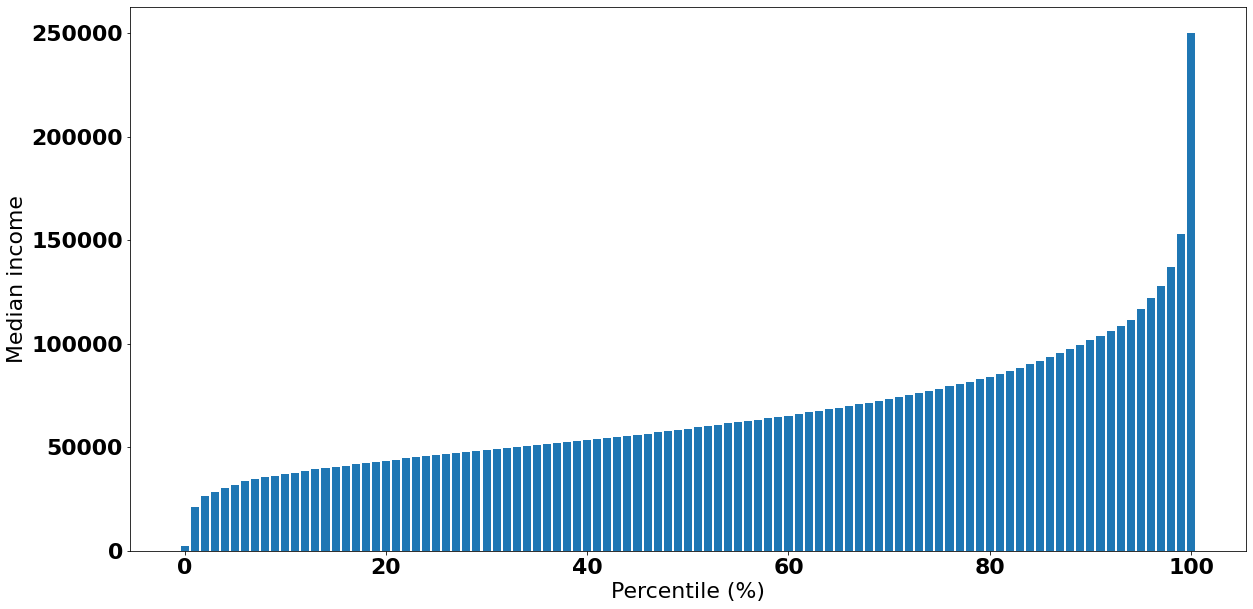

In [92]:
plt.bar(percentiles.perc,percentiles.income)
plt.title('Median income vs. percentile for US')
plt.xlabel('Percentile (%)')
plt.ylabel('Median income')
plt.show()

# New York 🗽

In [ ]:
# Ok. So I don't think we can use this table to get a state-based breakdown. 
# Let's look at some of the other options. 
# Blockgoup: 220,333 rows
# cbsa: 945 rows
# census tract: 74,001 rows
# Congressional district: 440 rows
# County: 3220 rows
# Place: 29,573 rows 
# Puma: 2378 rows
# School district elementary: 2181
# School district secondary: 538
# School district unified: 10,923 
# State: 52
# zcta: 33,120
# zipcodes: 33,120

In [ ]:
# Let's try census tract. 

In [25]:
ct = pd.read_csv('censustract_2018_5yr_geo_id_total_pop_median_income.csv')
ct['geo_id'] = ct['geo_id'].astype(str)
for i in range(len(ct.geo_id)):
    if len(ct.loc[i, 'geo_id']) == 10:
        ct.loc[i, 'geo_id'] = '0' + ct.loc[i, 'geo_id']
ct['state_code'] = ct['geo_id'].str[:2]

In [26]:
ct.state_code.unique()

array(['72', '35', '45', '06', '39', '21', '22', '04', '54', '12', '17',
       '40', '25', '26', '36', '20', '49', '48', '51', '55', '37', '47',
       '42', '15', '01', '28', '13', '34', '18', '53', '09', '11', '29',
       '32', '24', '05', '19', '27', '02', '46', '31', '16', '08', '10',
       '41', '38', '23', '44', '30', '33', '50', '56'], dtype=object)

In [28]:
ny = ct[ct.state_code == '36']
ny = ny.dropna()
ny = ny.reset_index().drop(columns='index')

In [78]:
ny

,geo_id,total_pop,median_income,state_code
0,36055001500,768.0,16855.0,36
1,36109001200,3058.0,48333.0,36
2,36055004900,1935.0,24432.0,36
3,36081056100,60.0,100000.0,36
4,36081011400,1382.0,49242.0,36
...,...,...,...,...
4788,36029016100,2764.0,47045.0,36
4789,36119981000,2026.0,38529.0,36
4790,36061009600,141.0,144063.0,36
4791,36103158007,8938.0,121563.0,36


In [69]:
print(average(ny.median_income, weights=ny.total_pop))
print(weighted.median(ny.median_income, ny.total_pop))

73598.69961758098
66327.90815132605


In [60]:
percentiles = pd.DataFrame()
for i in range(101):
    percentiles = pd.concat([percentiles, 
                            pd.DataFrame({'perc':[i],
                                          'income':[weighted_percentile(ny.median_income, i, ny.total_pop)]})])
percentiles = percentiles.reset_index().drop(columns='index')

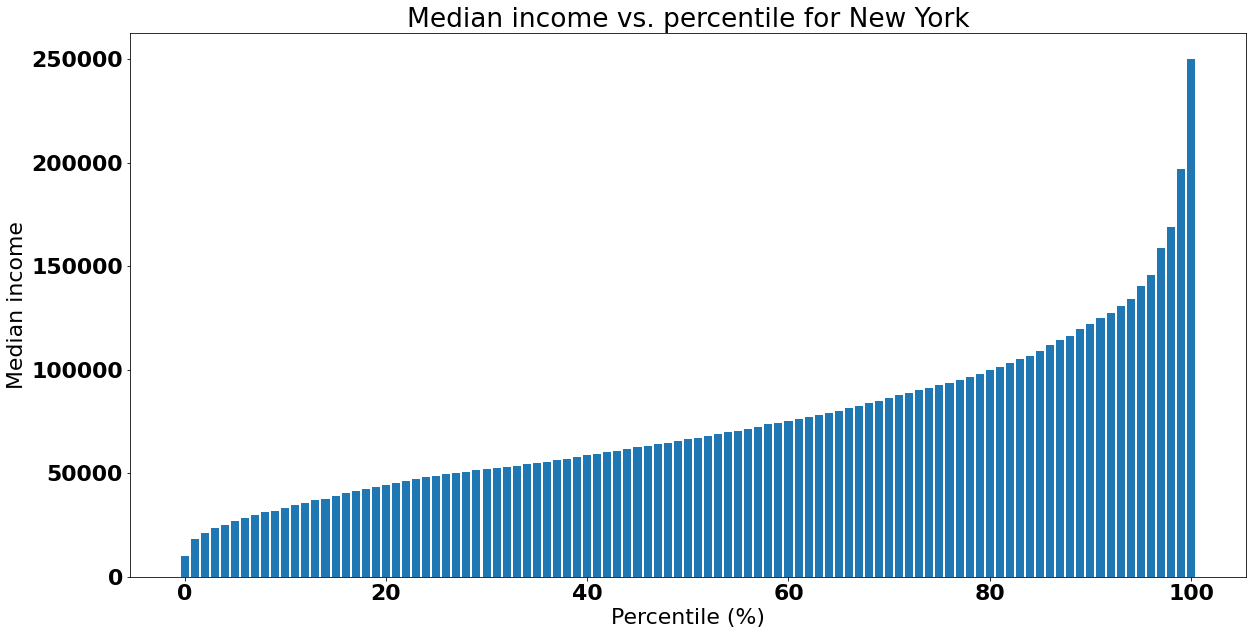

In [65]:
plt.bar(percentiles.perc,percentiles.income)
plt.title('Median income vs. percentile for New York')
plt.xlabel('Percentile (%)')
plt.ylabel('Median income')
plt.show()

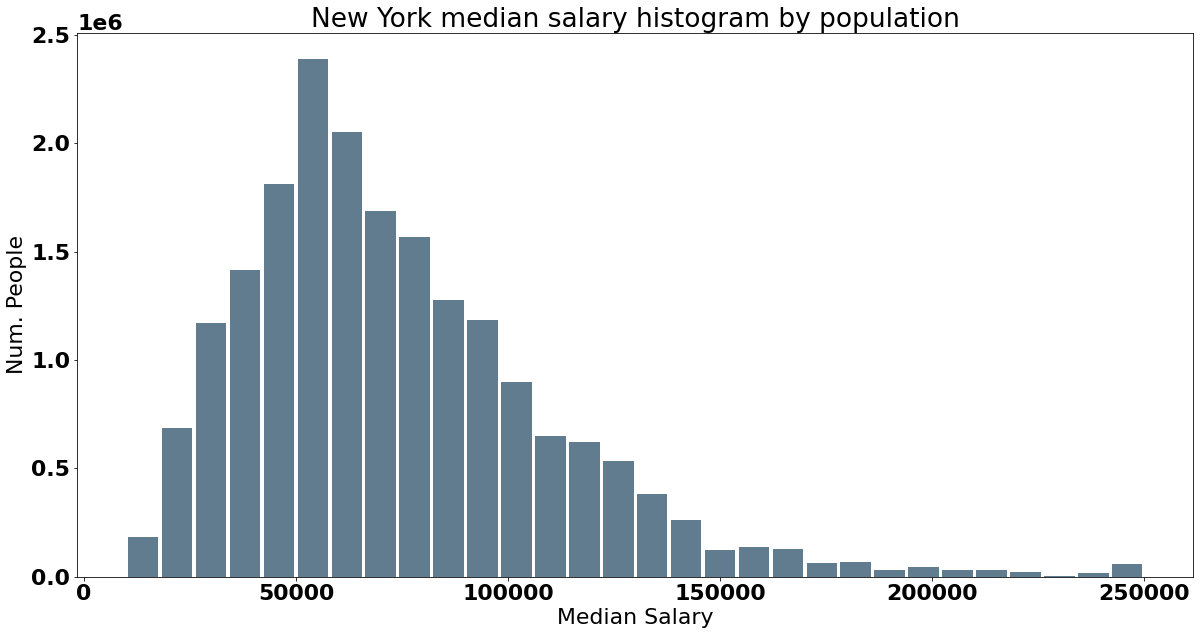

In [71]:
ny.median_income.plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e', weights=ny.total_pop)
plt.title('New York median salary histogram by population')
plt.xlabel('Median Salary')
plt.ylabel('Num. People')
plt.grid(alpha=0.5)

# California 🌴

In [72]:
ca = ct[ct.state_code == '06']
ca = ca.dropna()
ca = ca.reset_index().drop(columns='index')
print(average(ca.median_income, weights=ca.total_pop))
print(weighted.median(ca.median_income, ca.total_pop))

78204.28408795579
70886.50444981028


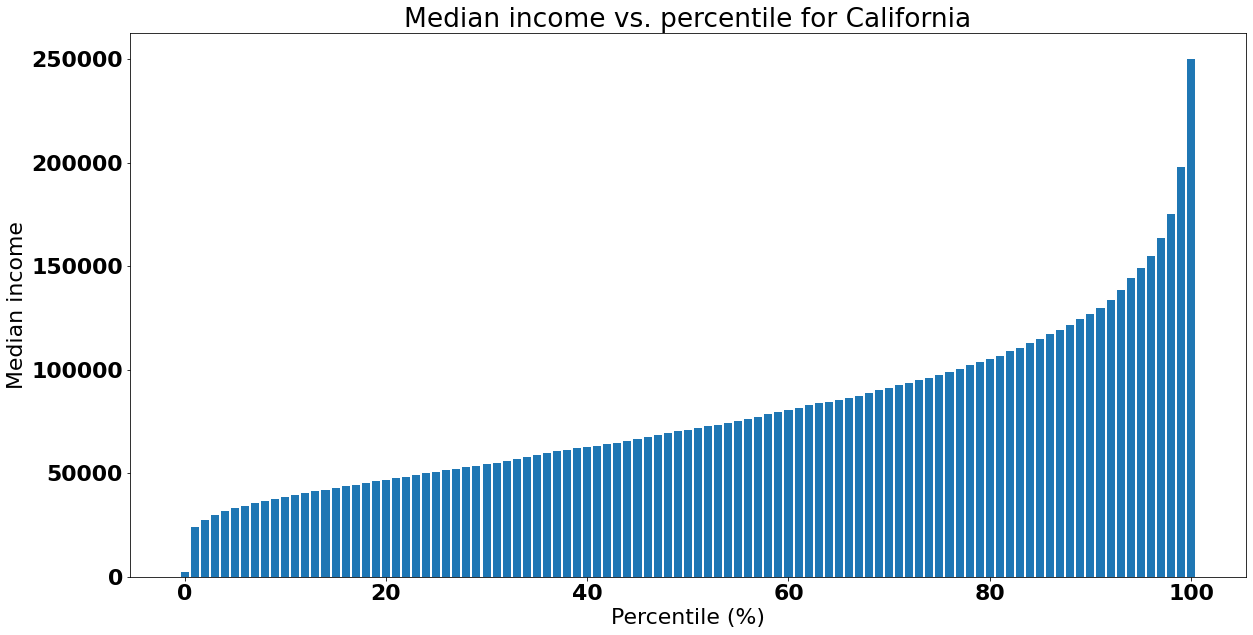

In [73]:
percentiles = pd.DataFrame()
for i in range(101):
    percentiles = pd.concat([percentiles, 
                            pd.DataFrame({'perc':[i],
                                          'income':[weighted_percentile(ca.median_income, i, ca.total_pop)]})])
percentiles = percentiles.reset_index().drop(columns='index')
plt.bar(percentiles.perc,percentiles.income)
plt.title('Median income vs. percentile for California')
plt.xlabel('Percentile (%)')
plt.ylabel('Median income')
plt.show()

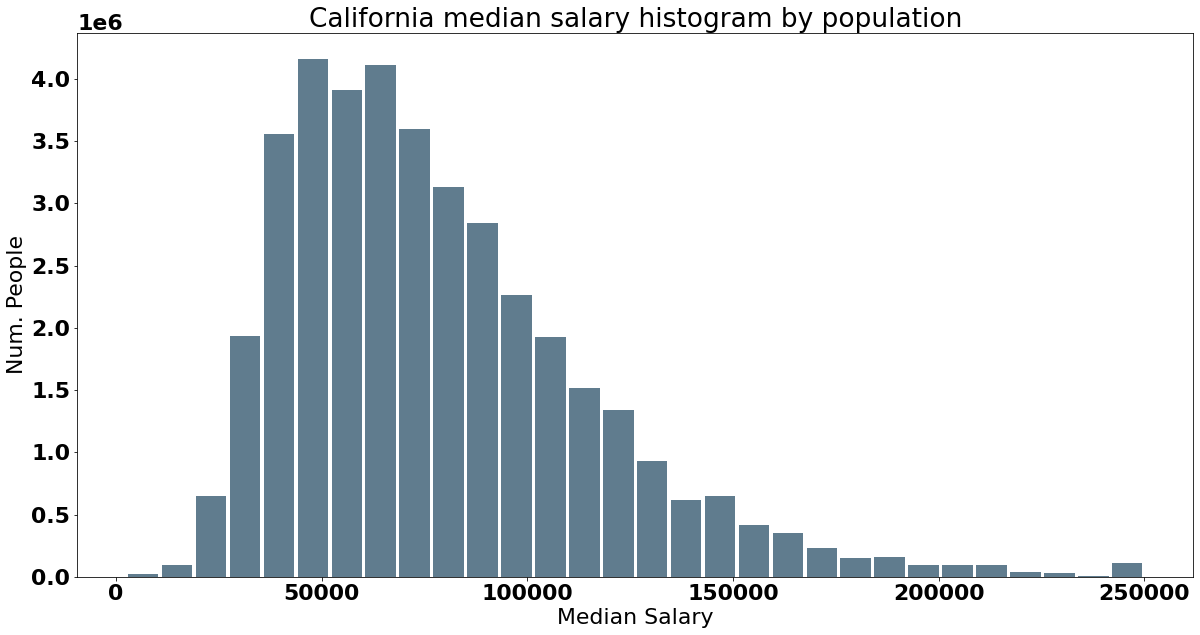

In [74]:
ca.median_income.plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e', weights=ca.total_pop)
plt.title('California median salary histogram by population')
plt.xlabel('Median Salary')
plt.ylabel('Num. People')
plt.grid(alpha=0.5)

# Texas 🤠

In [75]:
tx = ct[ct.state_code == '48']
tx = tx.dropna()
tx = tx.reset_index().drop(columns='index')
print(average(tx.median_income, weights=tx.total_pop))
print(weighted.median(tx.median_income, tx.total_pop))

66074.29900410553
58240.69430158404


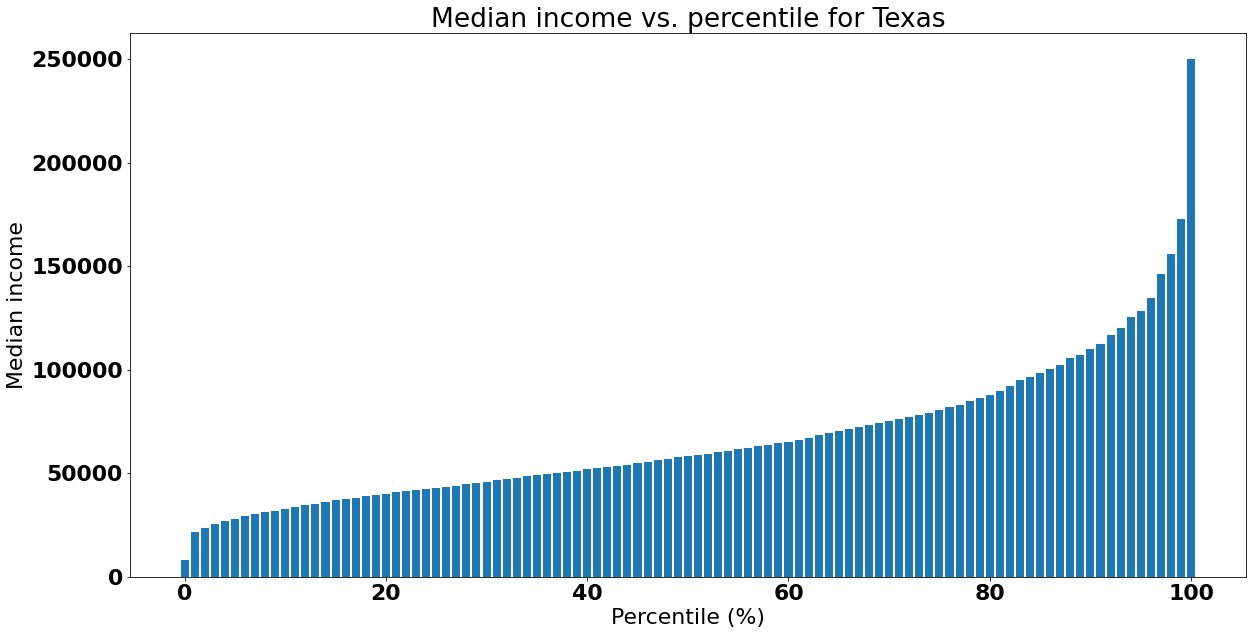

In [76]:
percentiles = pd.DataFrame()
for i in range(101):
    percentiles = pd.concat([percentiles, 
                            pd.DataFrame({'perc':[i],
                                          'income':[weighted_percentile(tx.median_income, i, tx.total_pop)]})])
percentiles = percentiles.reset_index().drop(columns='index')
plt.bar(percentiles.perc,percentiles.income)
plt.title('Median income vs. percentile for Texas')
plt.xlabel('Percentile (%)')
plt.ylabel('Median income')
plt.show()

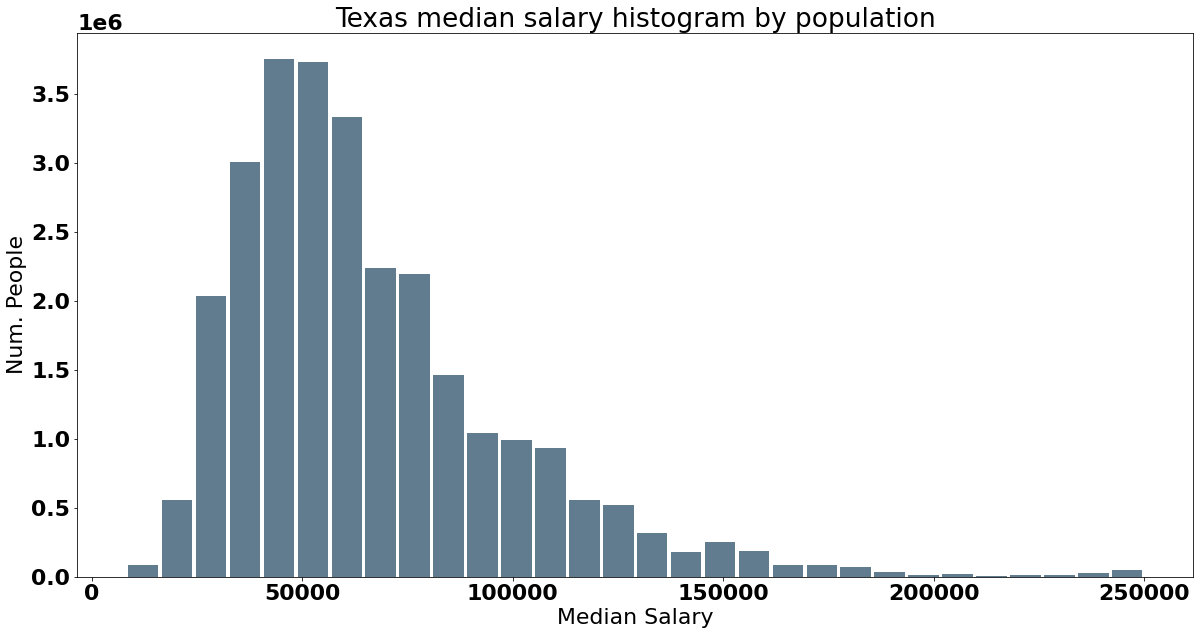

In [77]:
tx.median_income.plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e', weights=tx.total_pop)
plt.title('Texas median salary histogram by population')
plt.xlabel('Median Salary')
plt.ylabel('Num. People')
plt.grid(alpha=0.5)

# Florida 🍹

In [79]:
fl = ct[ct.state_code == '12'].dropna().reset_index().drop(columns='index')
print(average(fl.median_income, weights=fl.total_pop))
print(weighted.median(fl.median_income, fl.total_pop))

58149.8172000492
53214.0


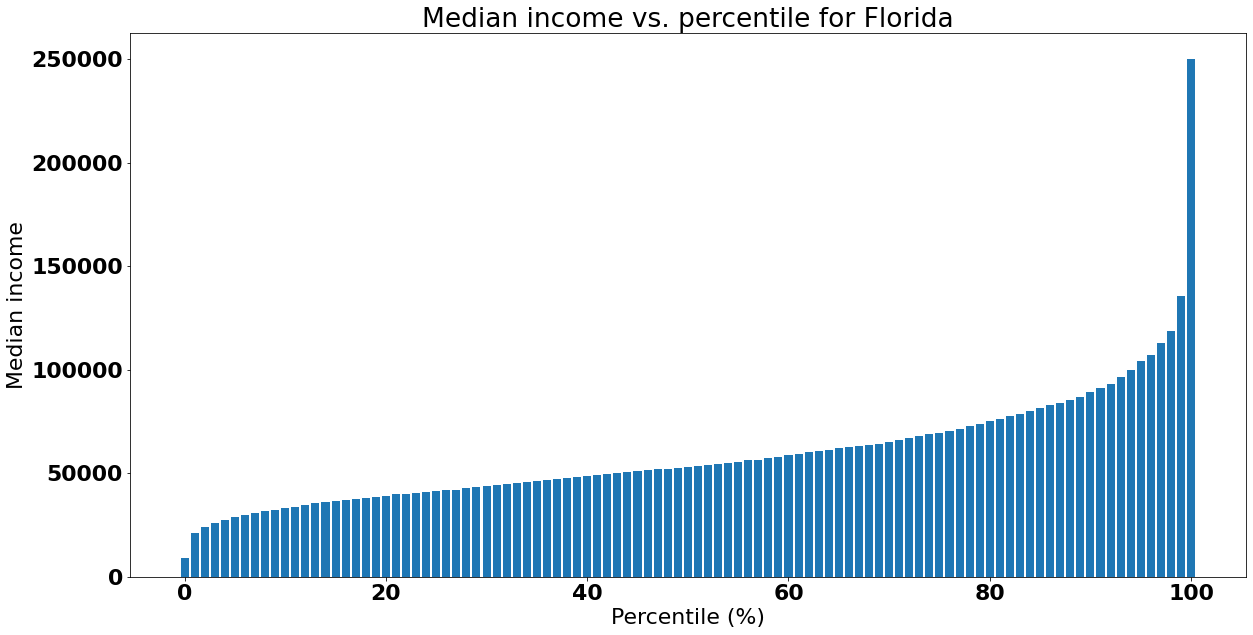

In [80]:
percentiles = pd.DataFrame()
for i in range(101):
    percentiles = pd.concat([percentiles, 
                            pd.DataFrame({'perc':[i],
                                          'income':[weighted_percentile(fl.median_income, i, fl.total_pop)]})])
percentiles = percentiles.reset_index().drop(columns='index')
plt.bar(percentiles.perc,percentiles.income)
plt.title('Median income vs. percentile for Florida')
plt.xlabel('Percentile (%)')
plt.ylabel('Median income')
plt.show()

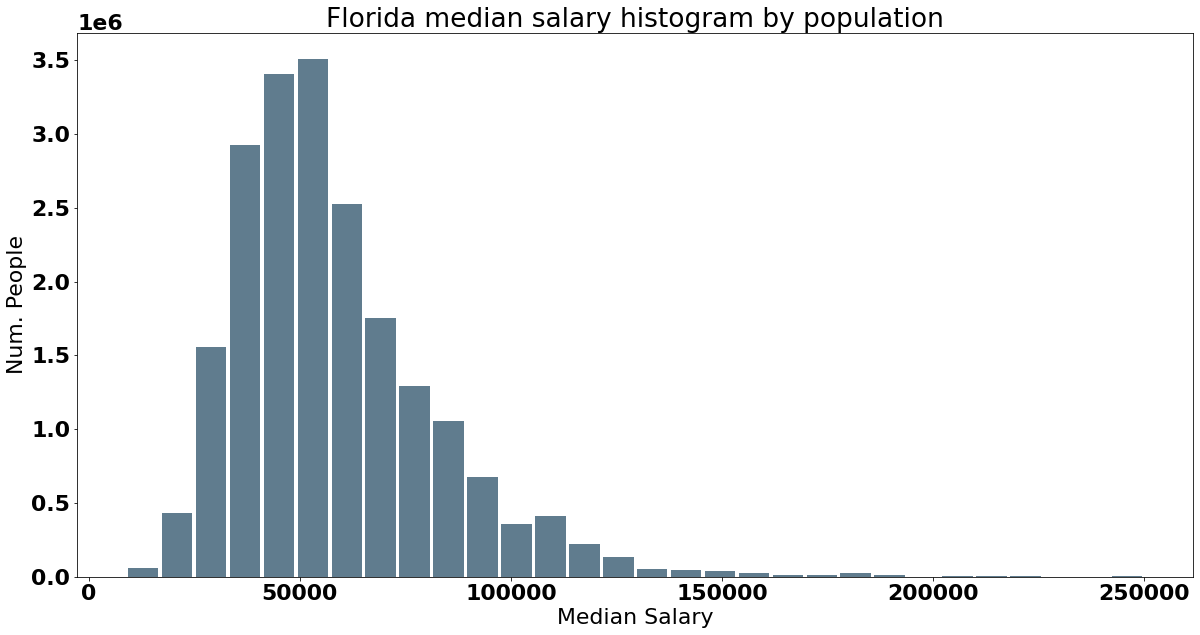

In [81]:
fl.median_income.plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e', weights=fl.total_pop)
plt.title('Florida median salary histogram by population')
plt.xlabel('Median Salary')
plt.ylabel('Num. People')
plt.grid(alpha=0.5)

# A second look at blockgroup

In [92]:
bg = pd.read_csv('blockgroup_2018_geo_id_tota_pop_median_income.csv')
bg['geo_id'] = bg['geo_id'].astype(str)
for i in range(len(bg.geo_id)):
    if len(bg.loc[i, 'geo_id']) == 11:
        bg.loc[i, 'geo_id'] = '0' + bg.loc[i, 'geo_id']
bg['state_code'] = bg['geo_id'].str[:2]

In [97]:
sorted(bg.state_code.unique())
# Actually this looks fine. Just 

['01',
 '02',
 '04',
 '05',
 '06',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '53',
 '54',
 '55',
 '56',
 '72']

In [ ]:
gbm_data = pd.concat([pd.DataFrame({'score':gbm_scores,'model':'Tuned Parameters'}),
                  pd.DataFrame({'score':gbm_base_scores,'model':'Default Parameters'})])
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 1.5)
sns.kdeplot(data=gbm_data, x="score", hue="model", fill=True, common_norm=False, alpha=0.4, linewidth=3)

plt.show()

In [104]:
fl['State'] = 'Florida'
ny['State'] = 'New York'
tx['State'] = 'Texas'
ca['State'] = 'California'

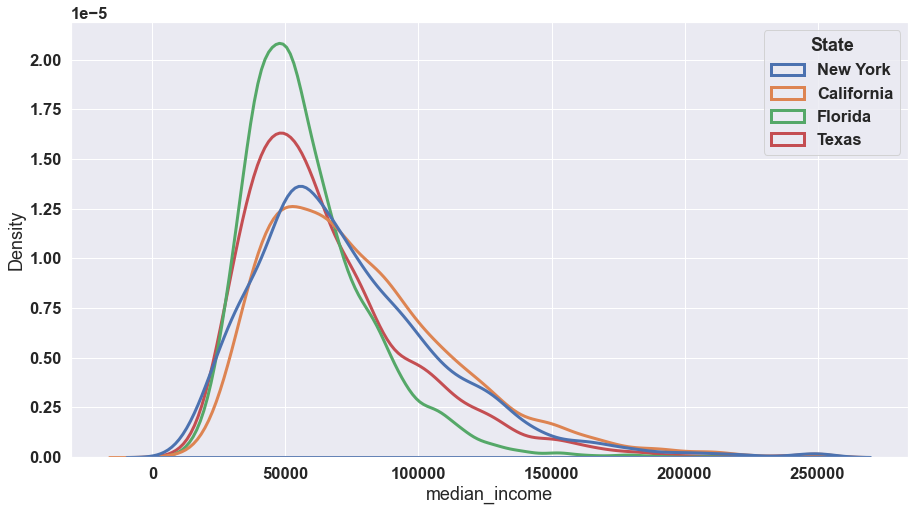

In [106]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 1.5)
sns.kdeplot(data=pd.concat([ny, ca, fl, tx]), x="median_income", weights="total_pop", hue="State", 
            fill=True, common_norm=False, alpha=0.0, linewidth=3)

plt.show()

In [ ]:
# Interesting. California and New York are more right-skewed than Texas and Florida